# Import Package
#### In this section the packages are imported

In [1]:
import numpy as np
import pandas as pd
import mat4py
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout ,BatchNormalization
from tensorflow.keras.models import Sequential , Model, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy ,SparseCategoricalCrossentropy ,categorical_crossentropy
from tensorflow.keras.layers import Conv1D , BatchNormalization,Activation,GlobalMaxPooling1D,Conv2D



from sklearn.preprocessing import StandardScaler

In [2]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.10.0
Keras Version: 2.10.0
GPU is available


# Import matfile targets and convert it to dataframe 

In [3]:
logAddress = 'Matlab_Annotatted_Trajectories'  

In [4]:
data = pd.DataFrame()
for dirname,_,filenames in os.walk(logAddress):
    for filename in filenames : 
        address = os.path.join(logAddress,filename)
        print(address)
        tempdata = mat4py.loadmat(address)
        tempdata = tempdata["Target"]
        
        lats = tempdata["Latitude"]
        longs = tempdata["Longitude"]
        classes = tempdata["Label"]
        
        df_temp = pd.DataFrame({"Latitude":lats,"Longitude":longs,"Class":classes})
        
        data = pd.concat([data,df_temp])

Matlab_Annotatted_Trajectories\list1.mat
Matlab_Annotatted_Trajectories\list10.mat
Matlab_Annotatted_Trajectories\list11.mat
Matlab_Annotatted_Trajectories\list12.mat
Matlab_Annotatted_Trajectories\list13.mat
Matlab_Annotatted_Trajectories\list14.mat
Matlab_Annotatted_Trajectories\list15.mat
Matlab_Annotatted_Trajectories\list16.mat
Matlab_Annotatted_Trajectories\list17.mat
Matlab_Annotatted_Trajectories\list18.mat
Matlab_Annotatted_Trajectories\list19.mat
Matlab_Annotatted_Trajectories\list2.mat
Matlab_Annotatted_Trajectories\list20.mat
Matlab_Annotatted_Trajectories\list21.mat
Matlab_Annotatted_Trajectories\list22.mat
Matlab_Annotatted_Trajectories\list23.mat
Matlab_Annotatted_Trajectories\list24.mat
Matlab_Annotatted_Trajectories\list25.mat
Matlab_Annotatted_Trajectories\list26.mat
Matlab_Annotatted_Trajectories\list27.mat
Matlab_Annotatted_Trajectories\list28.mat
Matlab_Annotatted_Trajectories\list29.mat
Matlab_Annotatted_Trajectories\list3.mat
Matlab_Annotatted_Trajectories\list30

In [5]:
num_experiment , _ =  data.shape
print(f"We have {num_experiment} measurements")

We have 2000 measurements


In [6]:
data.columns

Index(['Latitude', 'Longitude', 'Class'], dtype='object')

In [7]:
data.describe()

,Class
count,2000.000000
mean,2.143500
std,1.090643
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


# Data Visulization

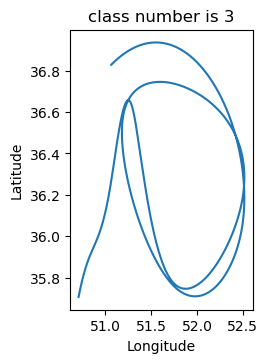

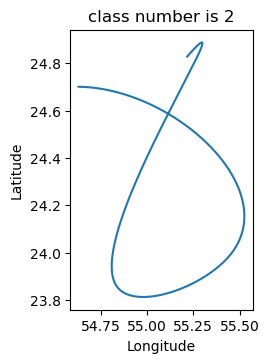

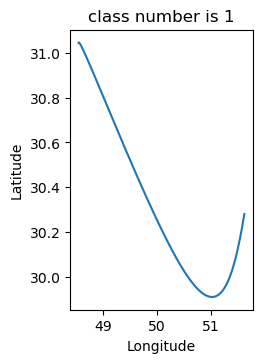

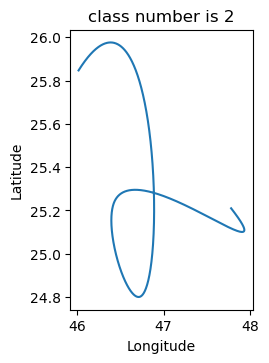

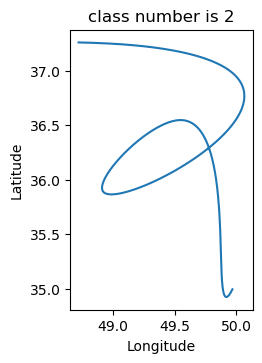

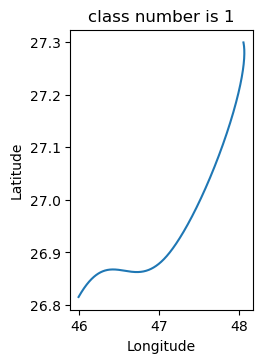

In [8]:
targets = data.sample(6)

fsize = (8,8)
plt.figure(figsize=fsize)

plt.subplot(2,3,1)
plt.plot(targets.iloc[0]["Longitude"],targets.iloc[0]["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
classnum = targets.iloc[0]["Class"]
plt.title(f"class number is {classnum}")
plt.show()   
    
    
plt.figure(figsize=fsize)    
plt.subplot(2,3,2)
plt.plot(targets.iloc[1]["Longitude"],targets.iloc[1]["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
classnum = targets.iloc[1]["Class"]
plt.title(f"class number is {classnum}")
plt.show()
    
plt.figure(figsize=fsize)    
plt.subplot(2,3,3)
plt.plot(targets.iloc[2]["Longitude"],targets.iloc[2]["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
classnum = targets.iloc[2]["Class"]
plt.title(f"class number is {classnum}")
plt.show()
    
plt.figure(figsize=fsize)   
plt.subplot(2,3,4)
plt.plot(targets.iloc[3]["Longitude"],targets.iloc[3]["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
classnum = targets.iloc[3]["Class"]
plt.title(f"class number is {classnum}")
plt.show()
    
      
plt.figure(figsize=fsize)    
plt.subplot(2,3,5)
plt.plot(targets.iloc[4]["Longitude"],targets.iloc[4]["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
classnum = targets.iloc[4]["Class"]
plt.title(f"class number is {classnum}")
plt.show()
    
    
plt.figure(figsize=fsize)    
plt.subplot(2,3,6)
plt.plot(targets.iloc[5]["Longitude"],targets.iloc[5]["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
classnum = targets.iloc[5]["Class"]
plt.title(f"class number is {classnum}")
plt.show()

# Separate train , test and validation data

In [9]:
data = data[data["Class"]<=4]

#### Shuffling data

In [10]:
data_shuffled = shuffle(data)

In [11]:
data_shuffled[0:10]

,Latitude,Longitude,Class
85,"[35.044585987261144, 35.04477220354299, 35.044...","[62.32484076433121, 62.32506304351115, 62.3252...",2
26,"[35.40127388535032, 35.402656510499604, 35.404...","[54.554140127388536, 54.55596626811306, 54.557...",1
82,"[22.713375796178344, 22.71290332497346, 22.712...","[55.4203821656051, 55.42198697476115, 55.42359...",1
71,"[30.127388535031848, 30.127947406940024, 30.12...","[61.433121019108285, 61.43807938395701, 61.443...",2
93,"[33.28662420382165, 33.286482343998806, 33.286...","[56.46496815286625, 56.465227859723335, 56.465...",1
62,"[35.12101910828025, 35.116310984872605, 35.111...","[63.98089171974523, 63.98189778493233, 63.9828...",1
14,"[29.363057324840764, 29.362136420587294, 29.36...","[51.92993630573248, 51.928216466203445, 51.926...",2
59,"[22.611464968152866, 22.61046646981157, 22.609...","[60.79617834394905, 60.7971082896895, 60.79804...",2
29,"[31.88535031847134, 31.885717036318585, 31.886...","[45.738853503184714, 45.740021759485124, 45.74...",3
5,"[29.388535031847134, 29.391944723540952, 29.39...","[45.9171974522293, 45.91617512872626, 45.91516...",3


In [12]:
data[0:10]

,Latitude,Longitude,Class
0,"[27.29936305732484, 27.299625466018348, 27.299...","[51.29299363057325, 51.294145988310866, 51.295...",1
1,"[31.121019108280255, 31.1220195262771, 31.1230...","[52.541401273885356, 52.5417994175924, 52.5422...",1
2,"[29.84713375796178, 29.847911241591305, 29.848...","[53.254777070063696, 53.25621246983042, 53.257...",1
3,"[35.095541401273884, 35.09561291157736, 35.095...","[54.171974522293, 54.17071448392492, 54.169455...",2
4,"[32.445859872611464, 32.44558715629, 32.445317...","[50.57961783439491, 50.582320421062725, 50.585...",2
5,"[27.88535031847134, 27.885829292109317, 27.886...","[53.35668789808918, 53.35760689685142, 53.3585...",2
6,"[29.59235668789809, 29.592707074334776, 29.593...","[50.37579617834395, 50.37707151429559, 50.3783...",1
7,"[33.210191082802545, 33.2101433298073, 33.2100...","[53.10191082802548, 53.10357731267334, 53.1052...",3
8,"[33.87261146496815, 33.872649807253794, 33.872...","[52.031847133757964, 52.03317032694554, 52.034...",3
9,"[32.802547770700635, 32.80239621005337, 32.802...","[54.80891719745223, 54.80948753500956, 54.8100...",2


In [13]:
data_shuffled["Class"].value_counts()

1    704
2    656
4    344
3    294
Name: Class, dtype: int64

In [14]:
X = data_shuffled[["Latitude","Longitude"]]
y = data_shuffled["Class"]-1

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [16]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_valid = X_valid.values
y_valid = y_valid.values

In [17]:
print(f"Number of training samples is = {X_train.shape[0]}")
print(f"Number of test samples is = {X_test.shape[0]}")
print(f"Number of validation samples is = {X_valid.shape[0]}")

Number of training samples is = 1198
Number of test samples is = 400
Number of validation samples is = 400


# Padding 

In [18]:
def convert_array_and_pad(input_array,max_num):
    m = input_array.shape[0]
    C = np.empty((m,max_num,2))
    for i in range(m):
        temp1 = input_array[i][0]
        temp2 = input_array[i][1]
        
        A =  np.pad(temp1,(0,max_num-len(temp1)),'constant',constant_values=temp1[-1])
        B =  np.pad(temp2,(0,max_num-len(temp1)),'constant',constant_values=temp2[-1])
        
        arr = np.transpose(np.asarray([A,B]))
        
        C[i,:] = arr
        
    return C

In [19]:
max_num = 7601
X_train_pad = convert_array_and_pad(X_train,max_num)
X_test_pad = convert_array_and_pad(X_test,max_num)
X_valid_pad = convert_array_and_pad(X_valid,max_num)

In [20]:
X_train_pad = X_train_pad.astype(np.float32)
y_train = y_train.astype(np.float32)

X_test_pad = X_test_pad.astype(np.float32)
y_test = y_test.astype(np.float32)

X_valid_pad = X_valid_pad.astype(np.float32)
y_valid = y_valid.astype(np.float32)

# Normalizing Data

In [21]:
def normalize_data(input_data):
    ss = StandardScaler()
    m = input_data.shape[0]
    C = np.empty((m,max_num,2))
    for i in range(m):
        arr = ss.fit_transform(input_data[i])
        C[i,:] = arr
    return C

In [22]:
X_train_normalize = normalize_data(X_train_pad)
X_test_normalize = normalize_data(X_test_pad)
X_valid_normalize = normalize_data(X_valid_pad)

# Define a Model

In [23]:
input_shape = (X_train_pad.shape[1] , X_train_pad.shape[2])

In [24]:
print(f"Input shape for keras model is {input_shape}")

Input shape for keras model is (7601, 2)


In [25]:
input_layer = Input(shape=input_shape)
x = Dense(512,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(),
          kernel_regularizer=regularizers.l1_l2(l1=1e-2,l2=1e-1))(input_layer)

x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Dense(256,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)


x = Dense(128,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)


x = Dense(64,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)


x = Flatten()(x)
output = Dense(4,activation='softmax')(x)

model = Model(input_layer,output)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7601, 2)]         0         
                                                                 
 dense (Dense)               (None, 7601, 512)         1536      
                                                                 
 batch_normalization (BatchN  (None, 7601, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7601, 512)         0         
                                                                 
 dense_1 (Dense)             (None, 7601, 256)         131328    
                                                                 
 batch_normalization_1 (Batc  (None, 7601, 256)        1024      
 hNormalization)                                             

In [ ]:
model.compile(optimizer=RMSprop(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Defining Callbacks

In [ ]:
class acc_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy') is not None and logs.get('accuracy')>0.95) and (logs.get('val_accuracy') is not None and logs.get('val_accuracy')>0.90):
            print("\nReached 95% accuracy and 90% validation accuracy so cancelling training!")
            
            self.model.stop_training = True

In [ ]:
callback = acc_callback()

# Training the Neural Nework

In [ ]:
history = model.fit(X_train_normalize, y_train,batch_size=64,verbose=True, epochs=100, 
                    validation_data=(X_valid_normalize, y_valid),callbacks =[callback] )

# Plot Training Results

In [ ]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# Save Model

In [ ]:
# model.save('CheckPointsFolder/myModel.h5')

# Load Model

In [27]:
from tensorflow.keras.models import load_model
model = load_model('CheckPointsFolder/myModel.h5')

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7601, 2)]         0         
                                                                 
 dense (Dense)               (None, 7601, 512)         1536      
                                                                 
 batch_normalization (BatchN  (None, 7601, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7601, 512)         0         
                                                                 
 dense_1 (Dense)             (None, 7601, 256)         131328    
                                                                 
 batch_normalization_1 (Batc  (None, 7601, 256)        1024      
 hNormalization)                                             

# Test Accuracy

In [29]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [30]:
get_test_accuracy(model,X_test_normalize,y_test)

accuracy: 0.960


# Plot Test Results

##### Plot the Random X test images, their predicted label, and the true label Color correct predictions in blue, incorrect predictions in red

In [31]:
predictions = model.predict(X_test_normalize)

13/13 [==============================] - 1s 28ms/step


In [32]:
def compare_results(num_rows,num_cols,predictions,y_test,X_test):
    n_image = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(n_image):
        randint = np.random.choice(X_test.shape[0], 1)[0]
        true_label = y_test[randint]
        # Plot Part 1
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.plot(X_test[randint][1],X_test[randint][0],color='black')
        predicted_label = np.argmax(predictions[randint])
        if predicted_label == true_label :
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"Predict:{predicted_label}| {100*np.max(predictions[randint]):2.0f}% |(True: {true_label})".format(color=color))
        
        # Plot Part 2
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        thisplot = plt.bar(range(4),predictions[randint],color="#777777")
        plt.ylim([0, 1])
        thisplot[predicted_label].set_color('red')
        thisplot[int(true_label)].set_color('blue')

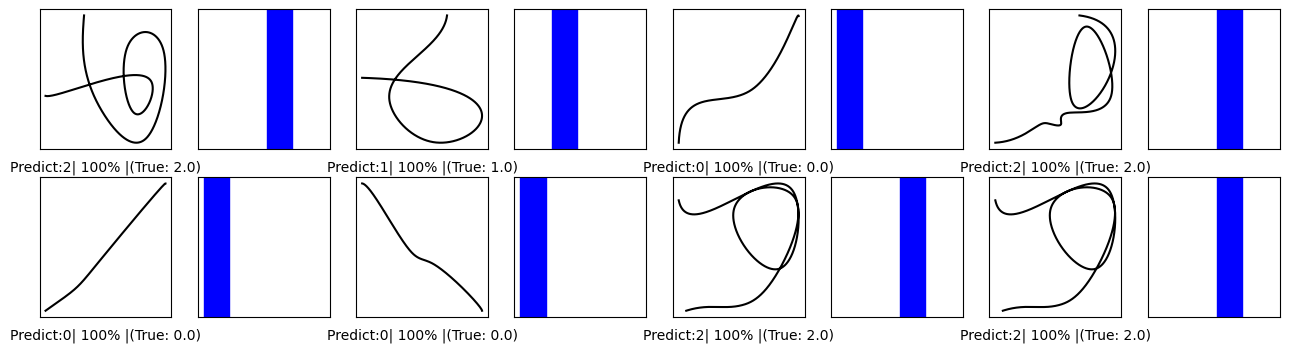

In [33]:
compare_results(2,4,predictions,y_test,X_test)